# Visualising data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from astropy.time import Time, TimeDelta
from datetime import datetime
from sklearn.metrics import accuracy_score
import seaborn as sn

In [4]:
colourblind = True
if colourblind:
    #colours = np.array([[80,0,0],[97,0,75]])

    #orange "#E69F00"
    #sky blue "#56B4E9"
    #bluish green "#009E73" 
    #yellow "#F5C710"  
    #blue "#0072B2"
    #vermillion "#D55E00" 
    #reddish purple   "#CC79A7"
    #black "#000000"
    #          blue      orange     reddish purple  sky blue   bluish green  amber        vermillion           
    colours = ["#0072B2","#E69F00","#CC79A7",       "#56B4E9",  "#009E73",   "#F5C710",  "#D55E00"  ]
    #colours = ["mediumblue","orange", "orchid","deepskyblue", "mediumaquamarine"]
else:
    colours = ["red","orange","blue","green","purple"]

In [5]:
data_file = '../Data/moon_sighting_data.csv'
data = pd.read_csv(data_file)

icouk_data = data[data["Source"]=="ICOUK"]
icop_data = data[data["Source"]=="ICOP"]
icop23_data = data[data["Source"]=="ICOP23"]
alrefay_data = data[data["Source"]=="ALREFAY"]
#allawi_data= data[data["Source"=="SCHAEFER-ODEH"]]
yallop_data = data[data["Source"]=="YALLOP"]

# sources = [icouk_data,icop_data,alrefay_data,allawi_data, yallop_data]
# source_names = ["ICOUK", "ICOP", "Alrefay", "Allawi","Yallop"]

sources = [icouk_data,icop_data,icop23_data,alrefay_data,yallop_data]
source_names = ["ICOUK", "ICOP", "ICOP23","Alrefay", "Yallop"]

print(data.shape[0])
counts = data[['Date', 'Latitude',"Longitude"]].value_counts()
print(f"Unique values: {counts[counts==1].shape[0]}")
#data = data[data["Cloud Level"] == 0]
data.head(5)

print(f"Post-2019 values: {data[data['Date']>2458484.5].shape[0]}")


5302
Unique values: 4849
Post-2019 values: 2691


<Axes: >

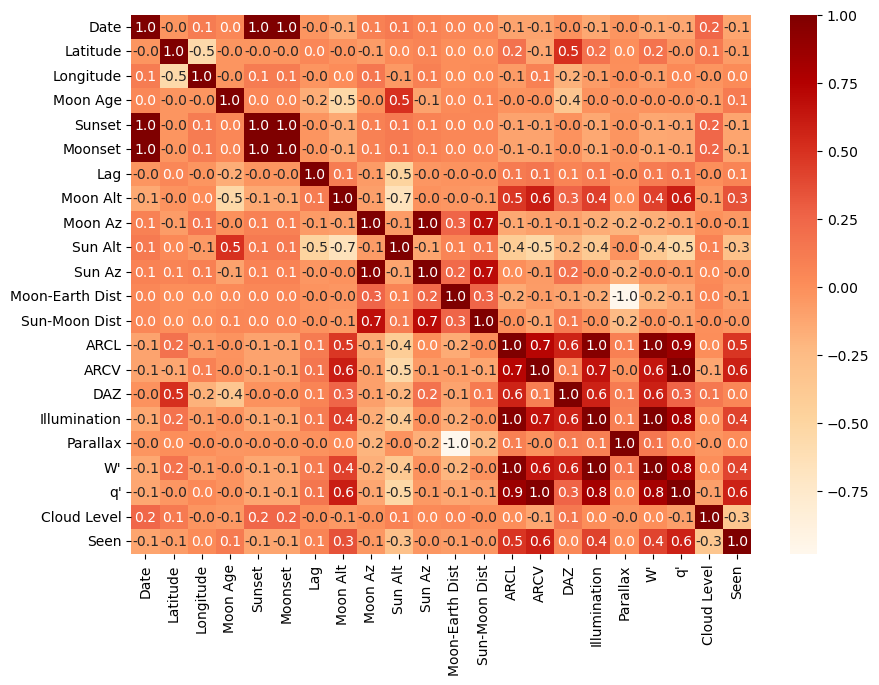

In [6]:
corr_data = data
corr_data = corr_data.drop(["Index","Method","Methods","Source","W","q"],axis=1)

corr_data["Seen"] = corr_data["Seen"].replace("Seen",1)
corr_data["Seen"] = corr_data["Seen"].replace("Not_seen",0)

# corr_data["Seen"] = corr_data["Seen"].replace("Seen",1)
# corr_data["Seen"] = corr_data["Seen"].replace("Not_seen",0)

#print(corr_data.head(5))
correlation = corr_data.corr()
plt.figure(figsize = (10,7))
sn.heatmap(correlation, annot=True,fmt=".1f",cmap="OrRd")
#sn.heatmap(correlation, annot=True,cmap="OrRd")

In [7]:
for source, name in zip(sources,source_names):
    min_date = Time(np.min(source["Date"]),format="jd").strftime("%d/%m/%Y")
    max_date = Time(np.max(source["Date"]),format="jd").strftime("%d/%m/%Y")
    print(f"{name}: {source.shape[0]} sightings, {min_date}-{max_date}")

counts = data[['Date', 'Latitude',"Longitude"]].value_counts()
print(f"Unique values: {counts[counts==1].shape[0]} \n")

uniques = 0
for source, name in zip(sources,source_names):
    counts = source[['Date', 'Latitude',"Longitude"]].value_counts()
    unique_values = counts[counts==1].shape[0]
    uniques += unique_values
    print(f"{name} Unique values: {unique_values}")
print(uniques)

ICOUK: 651 sightings, 13/10/2015-16/09/2023
ICOP: 2133 sightings, 16/12/2009-24/05/2020
ICOP23: 1747 sightings, 20/06/2020-14/11/2023
Alrefay: 476 sightings, 18/03/1988-13/11/2015
Yallop: 295 sightings, 01/07/1859-21/01/1996
Unique values: 4849 

ICOUK Unique values: 521
ICOP Unique values: 1989
ICOP23 Unique values: 1617
Alrefay Unique values: 467
Yallop Unique values: 255
4849


c:\ProgramData\miniconda3\envs\mphys-moon\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


## Geographic distribution of sightings

In [8]:
# crs = ccrs.PlateCarree()
# fig = plt.figure(figsize=(10,4))
# ax = fig.add_subplot(111,projection=crs)
# ax.coastlines()

# ax.gridlines(draw_labels=True,dms=True, x_inline=False, y_inline=False)

# for source, name,colour in zip(sources,source_names,colours):
#     x = source["Longitude"]
#     y = source["Latitude"]
#     ax.plot(x,y,".",label=name,color=colour)

# fig.suptitle("Geographic distribution of sightings")
# fig.legend(loc="lower center",ncol=5)
# plt.show()

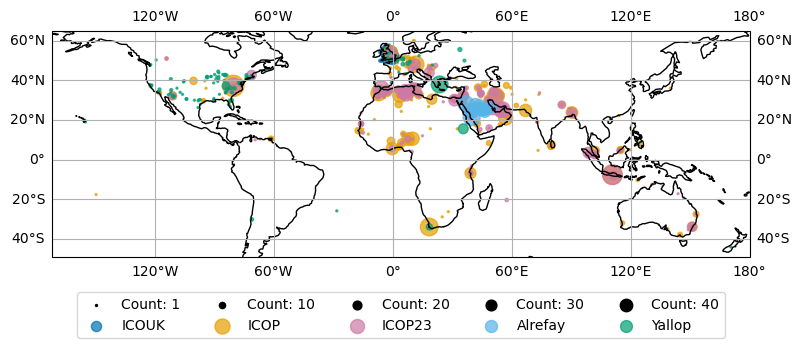

In [9]:
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111,projection=crs)
ax.coastlines()

ax.gridlines(draw_labels=True,dms=True, x_inline=False, y_inline=False)

bubble_sizes_legend = [1,10,20,30,40]  # Scaling up bubble sizes for better visibility
scale=2
# Plotting the scatter plot for each bubble size
for size in bubble_sizes_legend:
    ax.scatter([], [], s=size*scale, color="black",label=f'Count: {size}')

for source, name,colour in zip(sources,source_names,colours):
    counts = source.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')
    bubble_sizes = counts['count']*scale
    ax.scatter(counts['Longitude'], counts['Latitude'], s=bubble_sizes, alpha=0.7,label=name,color=colour)
    

#fig.suptitle("Geographic distribution of sightings")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,5,1,6,2,7,3,8,4,9]
fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="lower center",ncol=5)
plt.show()

In [10]:
# counts = data.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

# crs = ccrs.PlateCarree()
# fig = plt.figure(figsize=(10,4))
# ax = fig.add_subplot(111,projection=crs)
# #ax.tick_params(direction="out", length=8)
# ax.coastlines()

# ax.gridlines(draw_labels=True,dms=True, x_inline=False, y_inline=False)

# bubble_sizes = counts['count'] *4
# ax.scatter(counts['Longitude'], counts['Latitude'],color="cornflowerblue", s=bubble_sizes, alpha=0.7)
# ax.scatter([],[], s=20, alpha=0.7,color="cornflowerblue",label="All Data")
# #fig.suptitle("Geographic distribution of sightings")
# fig.legend(loc="lower center",ncol=5)
# plt.show()

## Visibility

In [11]:
if colourblind:
    #colours = ["#0072B2","#E69F00","#CC79A7","#56B4E9","#009E73" ]
    #colours = ["mediumblue","orange", "orchid","deepskyblue", "mediumaquamarine"]
    #piecolours = ["orange","deepskyblue","orchid", "mediumaquamarine","mediumblue"]
    piecolours = ["#E69F00", "#56B4E9","#CC79A7","#009E73" ,"#0072B2"]
else:
    piecolours = colours

In [12]:
# fig = plt.figure(figsize=(10,5))

# pies = data["Seen"].value_counts().sort_index()
# labels = data["Seen"].drop_duplicates().sort_values()
# labels = labels.str.replace("_"," ")
# ax1 = fig.add_subplot(2,3,1)
# ax1.pie(pies,colors=piecolours, autopct='%1.0f%%',textprops={'fontsize': 14})
# ax1.set_title(f"All sources\n(N={data.shape[0]})",fontsize=14)

# for i, source in enumerate(sources):
#     pies = source["Seen"].value_counts().sort_index()
#     labels = labels.drop_duplicates().sort_values()
#     ax = fig.add_subplot(2,3,i+2)
#     labels = labels.str.replace("_"," ")
    
#     ax.pie(pies,colors=piecolours,autopct='%1.0f%%',textprops={'fontsize': 14})
#     ax.set_title(f"{source_names[i]}\n(N={source.shape[0]})",fontsize=14)

# #fig.suptitle("Distribution of sightings")
# fig.legend(labels, loc='right',fontsize=11) 
# plt.tight_layout()
# plt.show()

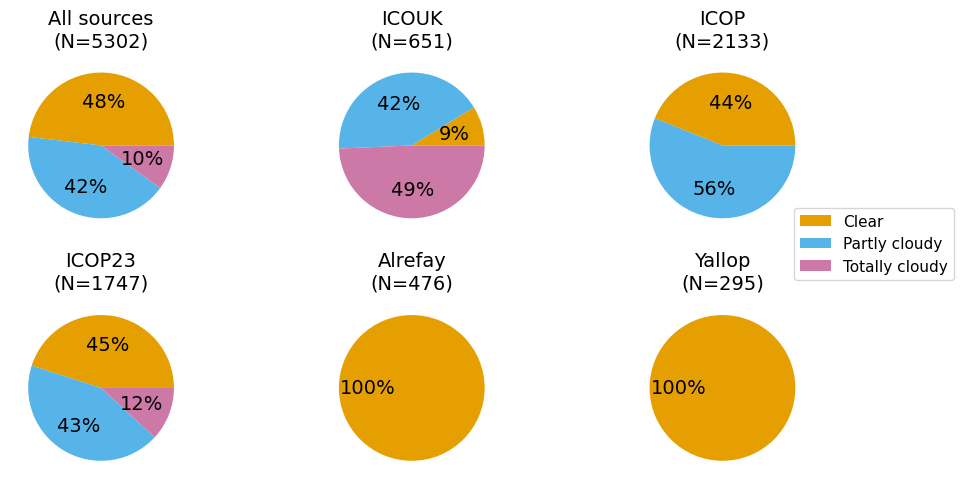

In [13]:
fig = plt.figure(figsize=(10,5))

pies = data["Cloud Level"].value_counts().sort_index()
labels = data["Cloud Level"].drop_duplicates().sort_values()
ax1 = fig.add_subplot(2,3,1)
ax1.pie(pies,colors=piecolours, autopct='%1.0f%%',textprops={'fontsize': 14})
ax1.set_title(f"All sources\n(N={data.shape[0]})",fontsize=14)

for i, source in enumerate(sources):
    pies = source["Cloud Level"].value_counts().sort_index()
    labels = labels.drop_duplicates().sort_values()
    ax = fig.add_subplot(2,3,i+2)    
    ax.pie(pies,colors=piecolours,autopct='%1.0f%%',textprops={'fontsize': 14})
    ax.set_title(f"{source_names[i]}\n(N={source.shape[0]})",fontsize=14)

#fig.suptitle("Distribution of cloud levels")
leg_labels = ["Clear","Partly cloudy","Totally cloudy"]
fig.legend(leg_labels, bbox_to_anchor=(1.05, 0.5),loc='center right',fontsize=11) 
plt.tight_layout()
plt.show()

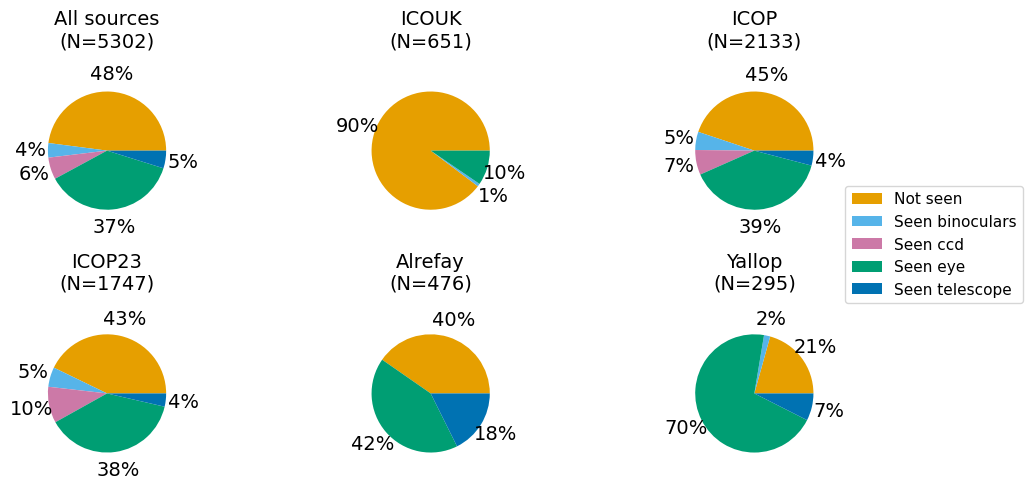

In [14]:
fig = plt.figure(figsize=(10,5))

pies = data["Method"].value_counts().sort_index()
labels = data["Method"].drop_duplicates().sort_values()
labels = labels.str.replace("_"," ")
method_colors = dict(zip(labels, piecolours))

ax1 = fig.add_subplot(2,3,1)
ax1.pie(pies,labels=labels,colors=[method_colors[key] for key in labels],labeldistance=None, autopct='%1.0f%%',textprops={'fontsize': 14},pctdistance=1.3)
ax1.set_title(f"All sources\n(N={data.shape[0]})\n",fontsize=14)

for i, source in enumerate(sources):
    pies = source["Method"].value_counts().sort_index()
    labels = source["Method"].drop_duplicates().sort_values()
    ax = fig.add_subplot(2,3,i+2)
    labels = labels.str.replace("_"," ")
    ax.pie(pies,labels=labels,colors=[method_colors[key] for key in labels],labeldistance=None,autopct='%1.0f%%',textprops={'fontsize': 14},pctdistance=1.3)
    ax.set_title(f"{source_names[i]}\n(N={source.shape[0]})\n",fontsize=14)

#fig.suptitle("Distribution of sightings")
h, l = ax1.get_legend_handles_labels()
fig.legend(h,l, bbox_to_anchor=(1.1, 0.5),loc='center right',fontsize=11) 
plt.tight_layout()
plt.show()

In [15]:
# fig = plt.figure(figsize=(10,5))

# ax = fig.add_subplot(2,3,1)
# grouped = data['Method'].value_counts().sort_index()/data.shape[0]*100
# ax = grouped.plot(kind='bar', stacked=True, color=colours)

# for i, source in enumerate(sources):
#     ax = fig.add_subplot(2,3,i+2)
#     grouped = source['Method'].value_counts().sort_index()/source.shape[0]*100
#     ax = grouped.plot(kind='bar', stacked=True, color=colours)
# #fig.legend(loc='right',fontsize=11) 
# plt.show()

In [16]:
# grouped = data.groupby(['Source', 'Method']).size().unstack(fill_value=0)
# source_counts = grouped.sum(axis=1)
# normalized_grouped = grouped.div(source_counts, axis=0)

# #grouped = data.groupby(['Method', 'Source']).size().unstack(fill_value=0)
# #source_counts = grouped.sum(axis=1)
# #normalized_grouped = grouped.div(source_counts, axis=0)


# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111)
# #normalized_grouped.plot(kind='bar', stacked=True, ax=ax,color=colours)
# grouped.plot(kind='bar', stacked=True, ax=ax,color=colours)
# ax.set_xlabel("Source",fontsize=14)
# ax.set_ylabel("Count %")
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
# fig.legend(title='Sources', loc='right')
# plt.show()

In [17]:
# dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]

# fig = plt.figure(figsize=(14,3))
# ax = fig.add_subplot(1,1,1)

# ax.hist(dates_list,log=True,bins=100)
# ax.set_title("Distribution of sightings")
# ax.set_ylabel("Log Counts")
# ax.set_xlabel("Year")
# plt.show()

c:\ProgramData\miniconda3\envs\mphys-moon\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


<Figure size 640x480 with 0 Axes>

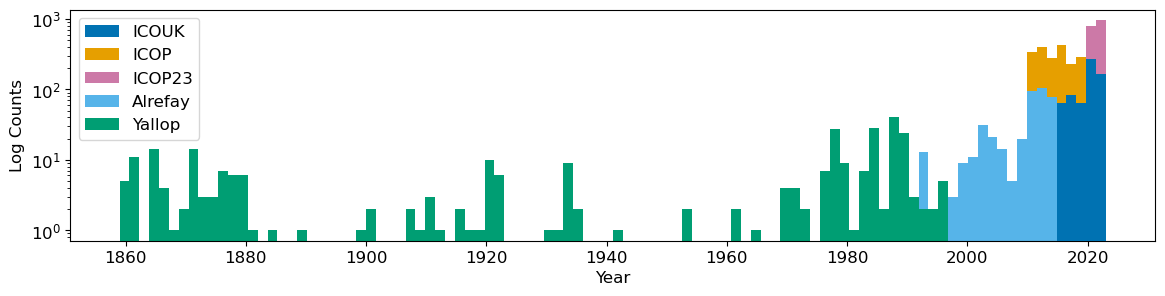

In [18]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]
#print(dates_list[1].timestamp())

(n, bins, patches) = plt.hist(dates_list, bins=100)
plt.clf()

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name,colour in zip(sources,source_names,colours):
    zorder = 0
    if name=="ICOUK":
        zorder = 5
    dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in source["Date"]]
    ax.hist(dates_list,bins,log=True,label=name,color=colour,zorder=zorder)
#ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts",fontsize=12)
ax.set_xlabel("Year",fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.legend(fontsize=12)
plt.show()

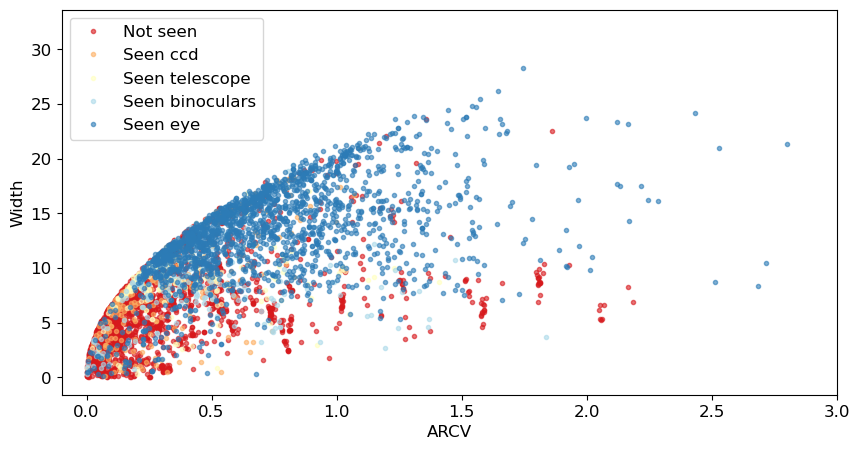

In [19]:
colourscale = ['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

labels = ["Not_seen","Seen_ccd","Seen_telescope","Seen_binoculars","Seen_eye"]

for label,colour in zip(labels,colourscale):
    method_obs = data[data["Method"]==label]
    name = label.replace("_"," ")
    ax.plot(method_obs["W'"], method_obs["ARCV"],".",label=name,color=colour,alpha=0.6)
    
#ax.set_title("Width against ARCV")
ax.set_ylabel("Width",fontsize=12)
ax.set_xlabel("ARCV",fontsize=12)
ax.set_xlim(-0.1,3)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.legend(fontsize=12)
plt.show()

## Accuracy of Yallop

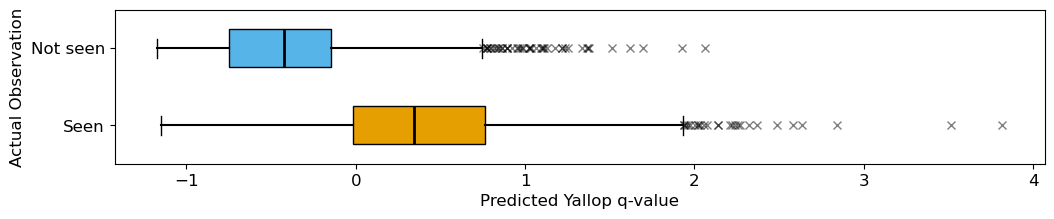

In [20]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0,widths = 0.5,patch_artist=True)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
for i, box in enumerate(bp['boxes']):
    num_boxes = len(data)
    box.set_facecolor(piecolours[i])
    box.set_edgecolor("black") 

for i,median in enumerate(bp['medians']):
    colour = "black"
    median.set(color=colour, linewidth=2)

for i,whisker in enumerate(bp['whiskers']):
    if i % 2 != 0:
        i-=1
    colour = "black"
    whisker.set(color=colour, linewidth=1.5)  # Set color and width for the whiskers

    
#ax.set_title("Distribution of q-values (All)")
ax.set_ylabel("Actual Observation",fontsize=12)
ax.set_xlabel("Predicted Yallop q-value",fontsize=12)
ax.set_yticklabels(['Seen', 'Not seen'],fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.show()

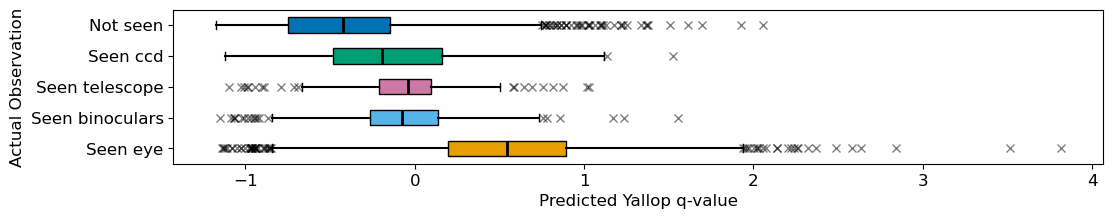

In [26]:
seen_eye = data["q'"][data["Method"]=="Seen_eye"]
seen_binoculars = data["q'"][data["Method"]=="Seen_binoculars"]
seen_telescope = data["q'"][data["Method"]=="Seen_telescope"]
seen_ccd = data["q'"][data["Method"]=="Seen_ccd"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_eye,seen_binoculars,seen_telescope,seen_ccd,not_seen_q_values],vert = 0,widths = 0.5,patch_artist=True)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
for i, box in enumerate(bp['boxes']):
    num_boxes = len(data)
    box.set_facecolor(piecolours[i])
    box.set_edgecolor("black") 

for i,median in enumerate(bp['medians']):
    colour = "black"
    median.set(color=colour, linewidth=2)

for i,whisker in enumerate(bp['whiskers']):
    if i % 2 != 0:
        i-=1
    colour = "black"
    whisker.set(color=colour, linewidth=1.5)  # Set color and width for the whiskers

    
#ax.set_title("Distribution of q-values (All)")
ax.set_ylabel("Actual Observation",fontsize=12)
ax.set_xlabel("Predicted Yallop q-value",fontsize=12)
ax.set_yticklabels(['Seen eye',"Seen binoculars","Seen telescope","Seen ccd", 'Not seen'],fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.show()

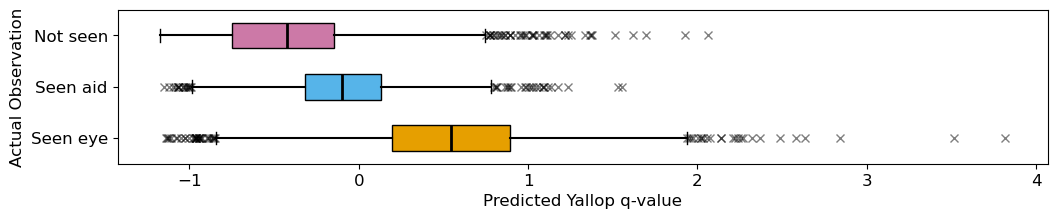

In [29]:
seen_eye = data["q'"][data["Method"]=="Seen_eye"]
seen_binoculars = data["q'"][data["Method"]=="Seen_binoculars"]
seen_telescope = data["q'"][data["Method"]=="Seen_telescope"]
seen_ccd = data["q'"][data["Method"]=="Seen_ccd"]
seen_aid = np.hstack((seen_binoculars,seen_telescope,seen_ccd))
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_eye,seen_aid,not_seen_q_values],vert = 0,widths = 0.5,patch_artist=True)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
for i, box in enumerate(bp['boxes']):
    num_boxes = len(data)
    box.set_facecolor(piecolours[i])
    box.set_edgecolor("black") 

for i,median in enumerate(bp['medians']):
    colour = "black"
    median.set(color=colour, linewidth=2)

for i,whisker in enumerate(bp['whiskers']):
    if i % 2 != 0:
        i-=1
    colour = "black"
    whisker.set(color=colour, linewidth=1.5)  # Set color and width for the whiskers

    
#ax.set_title("Distribution of q-values (All)")
ax.set_ylabel("Actual Observation",fontsize=12)
ax.set_xlabel("Predicted Yallop q-value",fontsize=12)
ax.set_yticklabels(['Seen eye',"Seen aid", 'Not seen'],fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.show()

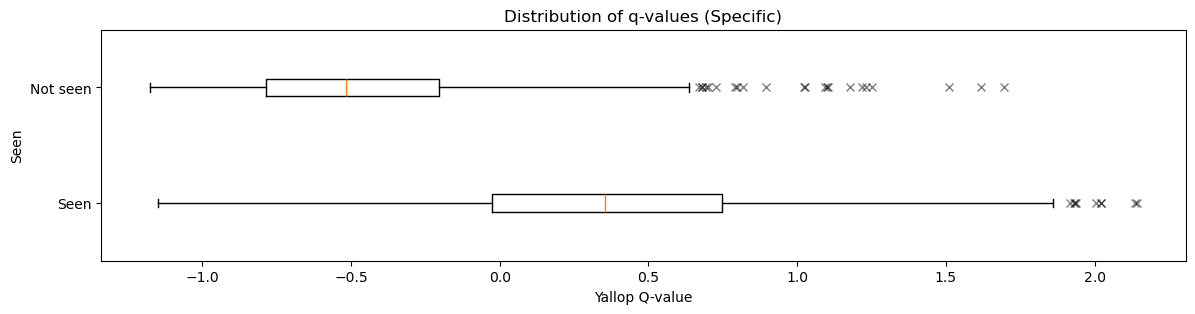

In [ ]:
# data_to_check = data[data["Source"]=="ICOP"]
# seen_q_values = data_to_check["q'"][data_to_check["Seen"]=="Seen"]
# not_seen_q_values = data_to_check["q'"][data_to_check["Seen"]=="Not_seen"]

# fig = plt.figure(figsize=(14,3))
# ax = fig.add_subplot(1,1,1)

# bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

# for flier in bp['fliers']:
#     flier.set(marker ='x',
#               color ='black',
#               alpha = 0.5)
    
# ax.set_title("Distribution of q-values (Specific)")
# ax.set_ylabel("Seen")
# ax.set_xlabel("Yallop Q-value")
# ax.set_yticklabels(['Seen', 'Not seen'])
# plt.show()

In [ ]:
below_danjon_data = data[np.logical_and(data["Seen"]=="Seen",7>=data["ARCL"])]
print(below_danjon_data.shape[0])
print(f"Total: {data.shape[0]}. Below ARCL<7 (Danjon limit): {below_danjon_data.shape[0]} {below_danjon_data.shape[0]/data.shape[0]:.2%}")

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source['Seen']=='Seen', 7>=source["ARCL"])].shape[0]
    print(f"{name}: {no_below_danjon}, {no_below_danjon/source.shape[0]:.2%} ")

# #interesting_data = icop_data[np.logical_and(icop_data["Seen"]=="Seen",-0.293>=icop_data["q'"])]
# interesting_data = yallop_data[np.logical_and(yallop_data["Seen"]=="Seen",-0.293>=yallop_data["q'"])]
# interesting_data = interesting_data.drop(["Methods","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist","Moon Az", "Moon Alt","Sun Az", "Sun Alt"],axis=1)
# interesting_data["Sunset"] = Time(interesting_data["Sunset"],format="jd").to_datetime()
# interesting_data["Moonset"] = Time(interesting_data["Moonset"],format="jd").to_datetime()
# interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()

97
Total: 5302. Below ARCL<7 (Danjon limit): 97 1.83%
ICOUK: 0, 0.00% 
ICOP: 42, 1.97% 
ICOP23: 52, 2.98% 
Alrefay: 0, 0.00% 
Yallop: 3, 1.02% 


In [ ]:
below_danjon_data = data[np.logical_and(data["Method"]=="Seen_eye",7>=data["ARCL"])]
print(below_danjon_data.shape[0])
print(f"Total: {data.shape[0]}. Below ARCL<7 for eye: {below_danjon_data.shape[0]}")

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source["Method"]=="Seen_eye", 7>=source["ARCL"])].shape[0]
    print(f"{name}: {no_below_danjon} {no_below_danjon/source.shape[0]:.2%}")

below_danjon_data.head(10)

29
Total: 5302. Below ARCL<7 for eye: 29
ICOUK: 0 0.00%
ICOP: 11 0.52%
ICOP23: 15 0.86%
Alrefay: 0 0.00%
Yallop: 3 1.02%


,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,Moon Az,...,Parallax,W,W',q,q',Cloud Level,Seen,Method,Methods,Source
710,59,2.455272e+06,39.67332,-94.79483,0.145,2.455272e+06,2.455272e+06,9.01667,0.35739,272.94725,...,54.65117,0.04570,0.04570,-0.95897,-0.95897,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
756,105,2.455361e+06,37.22966,-80.41368,0.571,2.455361e+06,2.455361e+06,31.46667,2.33792,298.63006,...,59.23428,0.11309,0.11317,-0.55860,-0.55855,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
940,289,2.455774e+06,39.78373,-100.44588,0.300,2.455774e+06,2.455774e+06,-13.30000,-1.88454,288.61669,...,59.16274,0.08283,0.08279,-0.92344,-0.92347,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
1037,386,2.456010e+06,39.78373,-100.44588,0.438,2.456010e+06,2.456010e+06,25.43333,2.01788,276.74449,...,54.53624,0.07448,0.07452,-0.63536,-0.63534,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
1512,861,2.456807e+06,37.22966,-80.41368,0.244,2.456807e+06,2.456807e+06,-3.33333,-0.89247,293.52645,...,55.69950,0.04631,0.04630,-1.12260,-1.12261,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
1553,902,2.456866e+06,-17.55267,-149.60001,0.211,2.456866e+06,2.456866e+06,6.78333,0.27198,285.04388,...,53.97717,0.05595,0.05595,-0.97046,-0.97046,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
1959,1308,2.457516e+06,37.22966,-80.41368,0.198,2.457516e+06,2.457516e+06,-2.18333,-0.78792,286.77766,...,61.15870,0.06698,0.06697,-1.12824,-1.12825,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
2097,1446,2.457723e+06,33.59394,-117.24150,0.526,2.457723e+06,2.457723e+06,34.18333,2.97590,245.93126,...,54.07379,0.10046,0.10054,-0.45267,-0.45261,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
2124,1473,2.457811e+06,10.62283,10.02878,0.105,2.457811e+06,2.457811e+06,0.76667,-0.46729,261.26839,...,58.03861,0.00071,0.00071,-1.13831,-1.13831,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
2163,1512,2.457900e+06,37.22966,-80.41368,0.197,2.457900e+06,2.457900e+06,-7.48333,-1.30379,291.42989,...,61.36881,0.08508,0.08505,-1.02452,-1.02454,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP


In [ ]:
#Not sure this actually works as some of the sunsets will be sunrises?
minute = -TimeDelta(60, format="sec") #Moonset must be 1 minute later than sunset for morning observation
morning_data = data[(data["Moonset"]-data["Sunset"])<minute]
evening_data = data[(data["Moonset"]-data["Sunset"])>=minute]

print(f"Total: {data.shape[0]} Morning: {morning_data.shape[0]} Evening: {evening_data.shape[0]}")

for source, name in zip(sources,source_names):
    smorning_data = source[(source["Moonset"]-source["Sunset"])<minute].shape[0]
    sevening_data = source[(source["Moonset"]-source["Sunset"])>=minute].shape[0]
    print(f"{name}: Morning: {smorning_data} Evening: {sevening_data}")

# #interesting_data = icop_data[np.logical_and(icop_data["Seen"]=="Seen",-0.293>=icop_data["q'"])]
# interesting_data = yallop_data[yallop_data["Moon Age"]>20]
# interesting_data = interesting_data.drop(["Methods","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist","Moon Az", "Moon Alt","Sun Az", "Sun Alt"],axis=1)
# interesting_data["Sunset"] = Time(interesting_data["Sunset"],format="jd").to_datetime()
# interesting_data["Moonset"] = Time(interesting_data["Moonset"],format="jd").to_datetime()
# interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()

Total: 5302 Morning: 445 Evening: 4857
ICOUK: Morning: 6 Evening: 645
ICOP: Morning: 98 Evening: 2035
ICOP23: Morning: 321 Evening: 1426
Alrefay: Morning: 0 Evening: 476
Yallop: Morning: 20 Evening: 275


In [ ]:
def yallop_accuracy(source):
    q_values = source["q'"].astype("float")
    quantified_q = np.empty((q_values.size),dtype=str)

    quantified_q[q_values > 0.216] = "Seen" #A Easily visible
    quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
    quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
    quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Not_seen" #D Will need optical aid to find crescent
    quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
    quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
    return accuracy_score(source['Seen'].str[0], quantified_q)

print(f"Yallop Accuracy (Seen/Not_seen): {yallop_accuracy(data):.1%}")
for source, name in zip(sources,source_names):
    print(f"{name}: Yallop Accuracy (Seen/Not_seen): {yallop_accuracy(source):.1%}")

Yallop Accuracy (Seen/Not_seen): 78.8%
ICOUK: Yallop Accuracy (Seen/Not_seen): 66.5%
ICOP: Yallop Accuracy (Seen/Not_seen): 80.2%
ICOP23: Yallop Accuracy (Seen/Not_seen): 76.3%
Alrefay: Yallop Accuracy (Seen/Not_seen): 97.1%
Yallop: Yallop Accuracy (Seen/Not_seen): 82.0%


In [ ]:
def yallop_accuracy_eye(source):
    q_values = source["q'"].astype("float")
    quantified_q = np.empty((q_values.size),dtype=str)

    data["Method"] = source["Method"].replace("Seen_binoculars", "Aid")
    data["Method"] = source["Method"].replace("Seen_telescope", "Aid")
    data["Method"] = source["Method"].replace("Seen_ccd", "Aid")

    quantified_q[q_values > 0.216] = "Seen" #A Easily visible
    quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
    quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
    quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Aid" #D Will need optical aid to find crescent
    quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
    quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
    return accuracy_score(source['Seen'].str[0], quantified_q)

print(f"Yallop Accuracy (Seen/With aid/Not_seen): {yallop_accuracy_eye(data):.1%}")
for source, name in zip(sources,source_names):
    print(f"{name}: Yallop Accuracy (Seen/With aid/Not_seen): {yallop_accuracy_eye(source):.1%}")

Yallop Accuracy (Seen/With aid/Not_seen): 75.9%
ICOUK: Yallop Accuracy (Seen/With aid/Not_seen): 55.1%
ICOP: Yallop Accuracy (Seen/With aid/Not_seen): 78.2%
ICOP23: Yallop Accuracy (Seen/With aid/Not_seen): 74.1%
Alrefay: Yallop Accuracy (Seen/With aid/Not_seen): 97.1%
Yallop: Yallop Accuracy (Seen/With aid/Not_seen): 80.7%
